## <font color=Green>GMD Figure 6 </font>  
#### <font color=blue> *VARIANCE DECOMPOSITION* PLOT </font>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import netCDF4 as nc
from pandas.plotting import table 
import xarray as xr
#
import warnings
import matplotlib
warnings.filterwarnings("ignore", category=matplotlib.MatplotlibDeprecationWarning)
#
colrs = 'rcbgmyrkcbgm'

##### <font color=blue> Load Module data from </font> <mark> facts-experiments </mark>

In [2]:
# Load FACTS workflow data as a dataframe.
#
df_G = pd.read_fwf('../001_GMD_IP_Modules_Data/ModuleTest_DataFile_List_coupling.txt',comment = '#')
df_L = pd.read_fwf('../001_GMD_IP_Modules_Data/ModuleTest_DataFile_List_coupling.local.txt',comment = '#')
#
df_ark_G = pd.read_fwf('../001_GMD_IP_Modules_Data/ModuleTest_DataFile_List_ar5k14-221217.txt',comment = '#')
df_ark_L = pd.read_fwf('../001_GMD_IP_Modules_Data/ModuleTest_DataFile_List_ar5k14.local-221217.txt',comment = '#')
#df

#### <font color=black> *Define* Functions </font>

##### <font color=blue> Input </font> <mark> Data </mark>

In [3]:
def IP_nc(df,wf1e,SCENARIO,EXPDATE):
    #  
    a = [];     ccomp = []
    MODNO = df.index.values;   # Number of datasets Module outputs
    #
    for scenario in SCENARIO:
        for wf in wf1e: 
            #
            # Pick Component acording to workflow.
            COMP = wf.split("-")[0]; MODULE = wf.split("-")[1]; 
            val = df.index[ (df['Component'] == COMP) & (df['Module'] == MODULE) ].values[0]
            SUB_MODULE = df["sub_Module"][val];  DATAFILE   = df["DataFile"][val];
            valIND = 0
            #       
            # Skip if data is absent.
            if df["DataFile"][val] == 'XXX':
                continue 
            #
            # Pick the data files & Import nc file to dataframe. 
            if SCENARIO[0][:3] == 'ssp':
                dataFOLDER  = '/projects/kopp/facts-experiments/{arg2}/coupling.{arg1}/output/'.format(arg1=scenario,arg2=EXPDATE)
                dataFILE    = 'coupling.{arg1}.'.format(arg1=scenario) + df["DataFile"][val]
            elif SCENARIO[0][:3] == 'rcp':
                dataFOLDER  = '/projects/kopp/facts-experiments/{arg2}/ar5k14.{arg1}/output/'.format(arg1=scenario,arg2=EXPDATE)
                dataFILE    = 'ar5k14.{arg1}.'.format(arg1=scenario) + df["DataFile"][val]
            d_nc        = xr.open_dataset(dataFOLDER + dataFILE)
            #print( "DataFILE ==> "+str(df["DataFile"][val])+"\n"+ str(d_nc.dims) + "\n" + str(d_nc.data_vars)+ "\n" + str(d_nc.coords)+"\n"+"-------------"+"\n"+"\n" )
            #
            # Index for time.
            ST = 2020 ; EN = 2100
            YindST = np.where(d_nc["years"].values == ST)[0][0];   YindEN = np.where(d_nc["years"].values == EN)[0][0]
            # Save data into a new variable.
            ccomp.append(COMP)
            b = d_nc.sea_level_change[:,YindST:YindEN+1,0].values
            a.append(b[None,:] )
    #stack all at once
    sampsloccomponents = np.vstack(a);  sampsloccomponents = np.transpose(sampsloccomponents,(1,0,2))
    yrs=d_nc.years[YindST:YindEN+1].values
    #
    return sampsloccomponents, ccomp, yrs; 

##### <font color=blue> Compute </font> <mark> Variance </mark>

In [4]:
def varV_varF(sampsloccomponents,ccomp):
    #
    varV = []; varF = [];  valIND = 0
    denom=np.var(np.sum(sampsloccomponents[:,:,:],axis = 1),axis=0)
    for co in ccomp:
        # u = np.sum(sampsloccomponents[:,0:valIND+1,:],axis = 1)
        u = sampsloccomponents[:,valIND,:]
        VAR_V=(np.var(u,axis=0))/1e6
        VAR_F=(np.var(u,axis=0))/denom
        varV.append(VAR_V)
        varF.append(VAR_F)
        valIND += 1    
    return varV, varF

##### <font color=blue> Specify **individual** WorkFlow </font> <mark> Components </mark>

In [ ]:
# Workflow Components.
wf1f_coupling = ['AIS-ipccar5'   , 'GrIS-FittedISMIP' ,  'Glaciers-ipccar5-GMIP2'  ,  'LWS-ssp' , '' ]
wf2f_coupling = ['AIS-larmip'    , 'GrIS-FittedISMIP' ,  'Glaciers-ipccar5-GMIP2'  ,  'LWS-ssp' , '' ]
wf3f_coupling = ['AIS-deconto21' , 'GrIS-FittedISMIP' ,  'Glaciers-ipccar5-GMIP2'  ,  'LWS-ssp' , '' ]
wf4_coupling  = ['AIS-bamber19'  , 'GrIS-bamber19'    ,  'Glaciers-ipccar5-GMIP2'  ,  'LWS-ssp' , '' ]
#
WORKFLO = ["wf1f","wf2f","wf3f","wf4"]

# <font color=green> Experiment==> **ar5kopp14** *(Global \& Local)* </font>

In [5]:
EXPDATE     = 221217
SCENARIO    = ['rcp85'];
# Workflow Components.
wf1e = ['AIS-kopp14', 'GrIS-kopp14', 'TE-kopp14','Glaciers-kopp14',  'LWS-kopp14']
df = df_ark_G;      [sampsloccomponents_ark_G, ccomp_ark_G, yrs] = IP_nc(df,wf1e,SCENARIO,EXPDATE);
#
# Note that AIS kopp14 is missing for local
wf1e = ['AIS-deconto16', 'GrIS-kopp14', 'TE-kopp14','Glaciers-kopp14',  'LWS-kopp14']
df = df_ark_L;      [sampsloccomponents_ark_L, ccomp_ark_L, yrs] = IP_nc(df,wf1e,SCENARIO,EXPDATE);

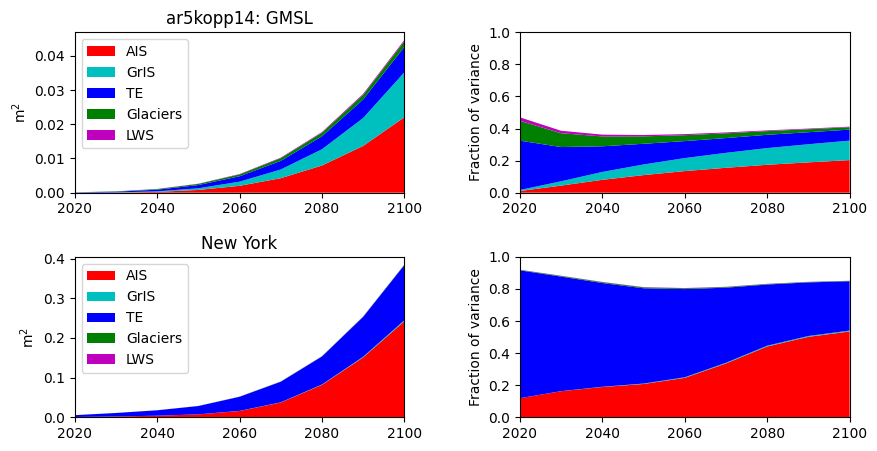

In [6]:
sampsloccomponents = sampsloccomponents_ark_G;      ccomp = ccomp_ark_G;
[varV, varF] = varV_varF(sampsloccomponents,ccomp)
#
plt.subplots(figsize=(10, 5));
#
# Varince.
plt.subplot(2, 2, 1); 
plt.stackplot(yrs,varV[0],varV[1], varV[2], varV[3], varV[4], labels=ccomp, colors=colrs);
plt.legend(loc='upper left'); plt.title('ar5kopp14: GMSL'); plt.xlabel(''); plt.ylabel('m$^2$');
plt.xlim([2020, 2100]);
#
# Fraction of variance.
plt.subplot(2, 2, 2);   plt.stackplot(yrs,varF[0],varF[1], varF[2], varF[3], varF[4], labels=ccomp, colors=colrs);
plt.title(''); plt.xlabel(''); plt.ylabel('Fraction of variance');
plt.xlim([2020, 2100]); plt.ylim([0, 1])
#
#
sampsloccomponents = sampsloccomponents_ark_L;      ccomp = ccomp_ark_L
[varV, varF] = varV_varF(sampsloccomponents,ccomp)
#
# Varince.
plt.subplot(2, 2, 3);   plt.stackplot(yrs,varV[0],varV[1], varV[2], varV[3], varV[4], labels=ccomp, colors=colrs);
plt.legend(loc='upper left');   plt.title('New York'); plt.xlabel(''); plt.ylabel('m$^2$');
plt.xlim([2020, 2100])
#
# Fraction of variance.
plt.subplot(2, 2, 4);   plt.stackplot(yrs,varF[0],varF[1], varF[2], varF[3], varF[4], labels=ccomp, colors=colrs);
plt.title(''); plt.xlabel(''); plt.ylabel('Fraction of variance');
plt.xlim([2020, 2100]);     plt.ylim([0, 1])
#
plt.subplots_adjust(wspace=0.35, hspace=0.4)
#
#
plt.show()

# <font color=black> **=======================================================================** </font>